In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import os
import seaborn as sns
import numpy as np

In [31]:
data_folder = "../data"
filename = "pulsar_stars.csv"
data = pd.read_csv(os.path.join(data_folder, filename))
seed = 3208729
np.random.seed(seed)

In [8]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [19]:
data_for_plot = data.copy(deep=True)
data_for_plot['target_class'] = data_for_plot['target_class'].map(lambda x: 'not pulsar' if x == 0 else 'pulsar')
data_for_plot.columns = ['mu_ip', 'sigma_ip', 'kurtosis_ip', 'skewness_ip', 'mu_dmsnr', 'sigma_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target_class']
data_for_plot.head()

,mu_ip,sigma_ip,kurtosis_ip,skewness_ip,mu_dmsnr,sigma_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,not pulsar
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,not pulsar
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,not pulsar
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,not pulsar
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,not pulsar


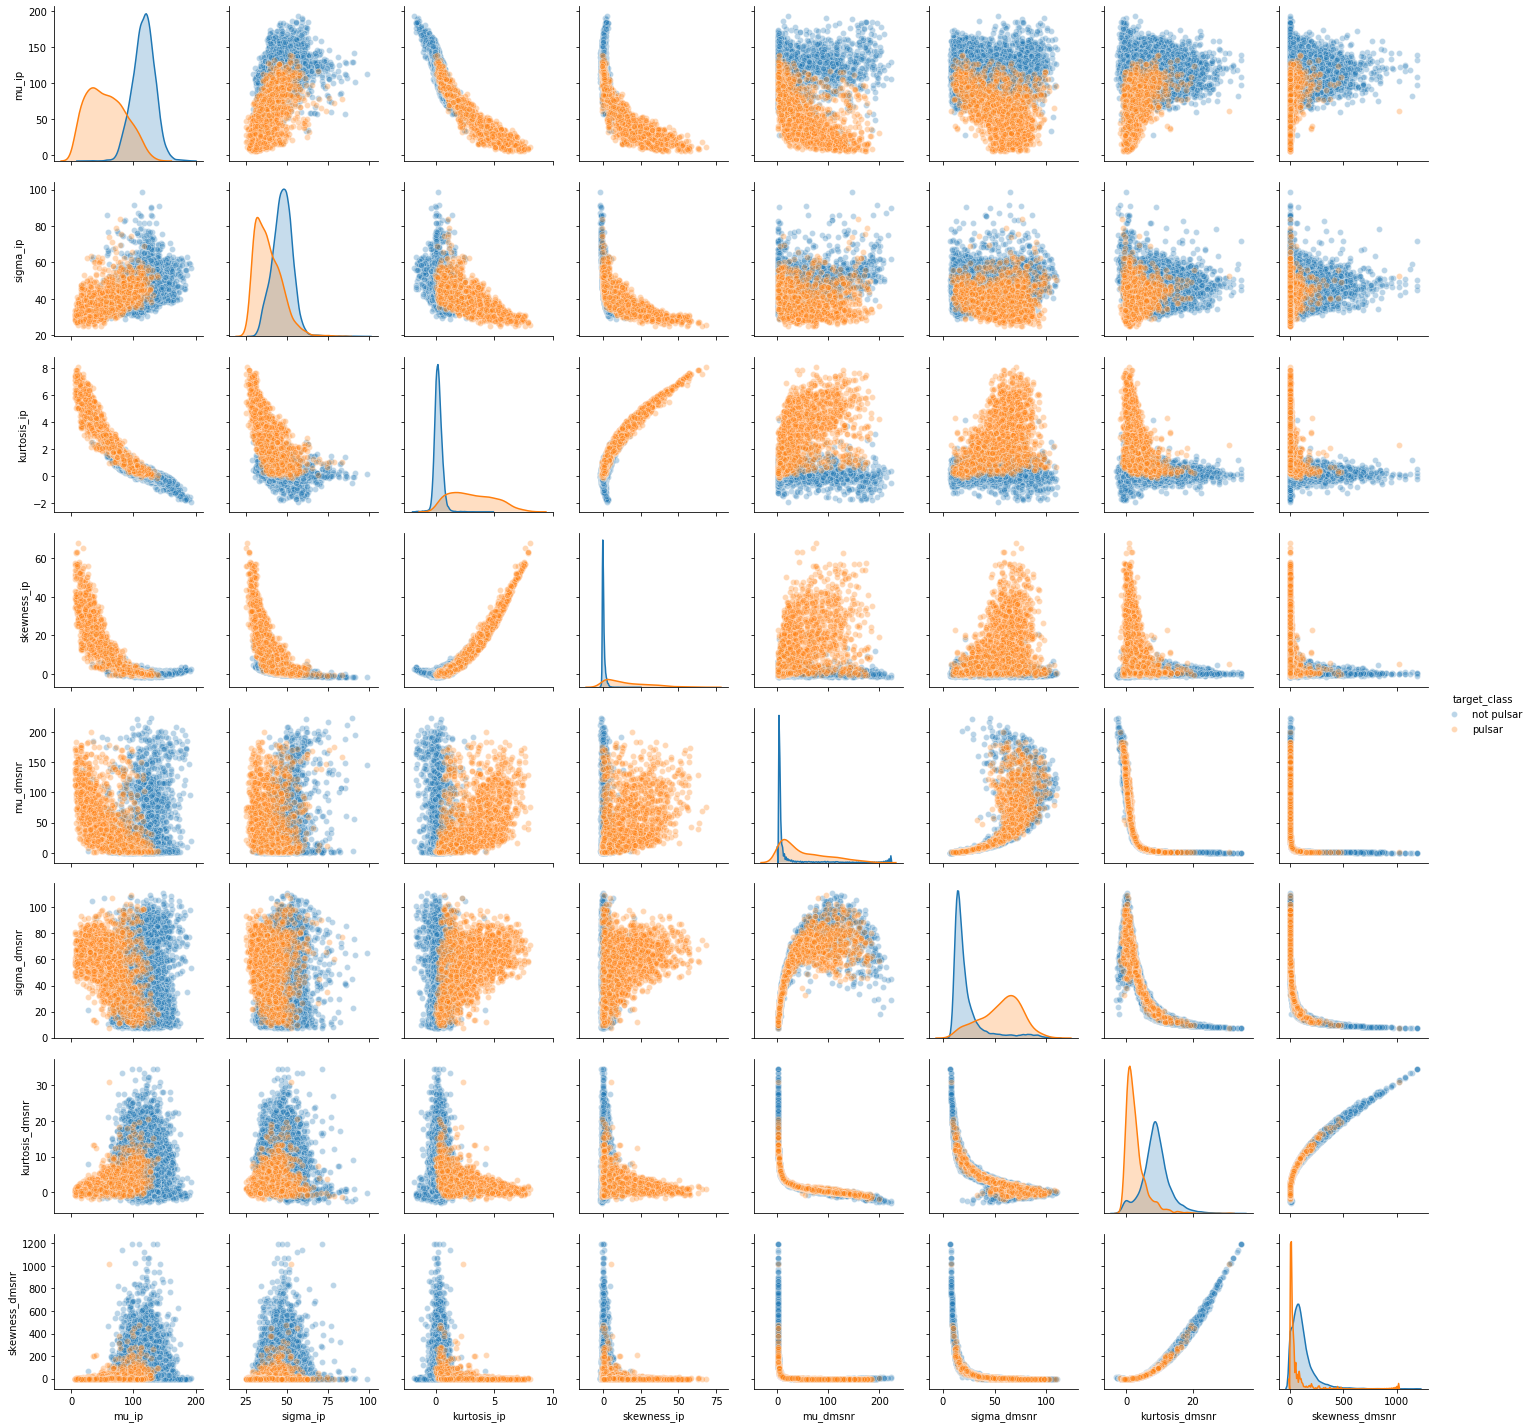

In [28]:
sns.pairplot(data_for_plot, hue="target_class", plot_kws={'alpha':0.3});
plt.savefig('pairplot.png')

In [22]:
data_for_plot['target_class'].value_counts()

not pulsar    16259
pulsar         1639
Name: target_class, dtype: int64

In [35]:
data_for_split = data_for_plot.copy(deep=True)
data_for_split['target_class'] = data['target_class']
fakes = data_for_split[data_for_split['target_class'] == 0]
pulsars = data_for_split[data_for_split['target_class'] == 1]

ttt_ratio = 0.8
fakes_train_size = int(ttt_ratio * len(fakes))
pulsars_train_size = int(ttt_ratio * len(pulsars))

fakes_permutation = np.random.permutation(len(fakes))
fakes_train = fakes.iloc[fakes_permutation[:fakes_train_size], :]
fakes_test = fakes.iloc[fakes_permutation[fakes_train_size:], :]

pulsars_permutation = np.random.permutation(len(pulsars))
pulsars_train = pulsars.iloc[pulsars_permutation[:pulsars_train_size], :]
pulsars_test = pulsars.iloc[pulsars_permutation[pulsars_train_size:], :]

train_data = pd.concat([fakes_train, pulsars_train]).sample(frac=1).reset_index(drop=True)
test_data = pd.concat([fakes_test, pulsars_test]).sample(frac=1).reset_index(drop=True)

train_data.to_csv(os.path.join(data_folder, "train_data.csv"), index=False)
test_data.to_csv(os.path.join(data_folder, "test_data.csv"), index=False)

In [37]:
fakes_train_size, pulsars_train_size

(13007, 1311)

In [40]:
train_data.head(30)

,mu_ip,sigma_ip,kurtosis_ip,skewness_ip,mu_dmsnr,sigma_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target_class
0,87.726562,39.299673,0.576202,1.603801,2.035953,13.301603,11.584755,175.445419,0
1,125.218750,57.256951,0.021157,-0.698371,25.912207,52.087043,1.973674,2.918885,0
2,130.335938,42.793888,0.215425,0.301680,2.705686,16.137536,9.096294,102.456140,0
3,133.726562,48.794325,0.110197,0.226866,2.345318,18.835416,9.842635,107.053984,0
4,127.632812,44.117186,0.067652,0.103196,9.392977,34.508291,4.039993,16.481965,0
5,129.882812,51.839991,0.135181,-0.274210,4.779264,27.184243,6.395681,42.698739,0
6,8.843750,31.102260,7.147370,51.309046,151.714047,75.049439,-0.210533,-1.278222,1
7,107.187500,50.090972,0.233861,-0.182829,5.286789,26.880303,5.893580,36.967633,0
8,89.335938,44.802566,0.771258,1.143718,3.896321,23.764683,7.015481,53.479785,1
9,104.968750,43.573024,0.435196,0.941352,2.625418,15.137889,8.441692,96.130135,0


In [42]:
test_data['target_class'].value_counts()

0    3252
1     328
Name: target_class, dtype: int64